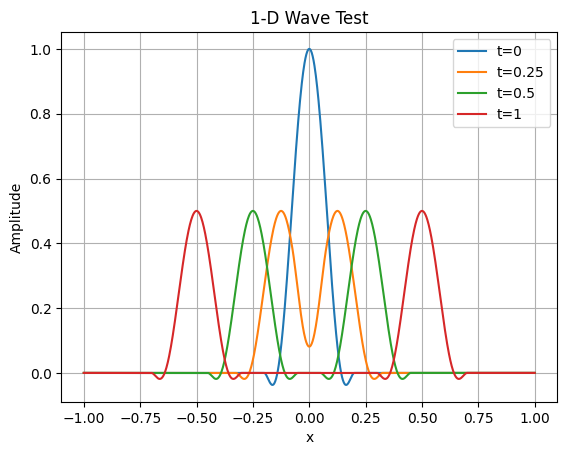

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# i.Solution analytique

a = 0.2
c = 1/2

def u_0(x):
    if abs(x)<=a:
        return (1-(x/a)**2)**2*(1-2*(x/a)**2)
    else:
        return 0

def solution_exacte(x,t):
    return 0.5*(u_0(x-c*t)+u_0(x+c*t)) #avec u1(x)=0


#les valeurs des x pour u(x,t)
x = np.linspace(-1, 1, 1000)
#np.linspace(a, b, c) est un tableau numpy comprenant tous les a+i*(b-a)/(c-1) avec i allant de 0 a c-1.

#les valeurs de t pour u(x,t)
t = [0, 0.25, 0.5, 1]


liste = [] #les valeurs u(x,t)

plt.figure()

for i in t:
    liste = [solution_exacte(j, i) for j in x]
    plt.plot(x,liste, label = "t="+str(i))
    liste=[]

plt.xlabel("x")
plt.ylabel("Amplitude")
plt.title("1-D Wave Test")
plt.legend()
plt.grid()
plt.show()

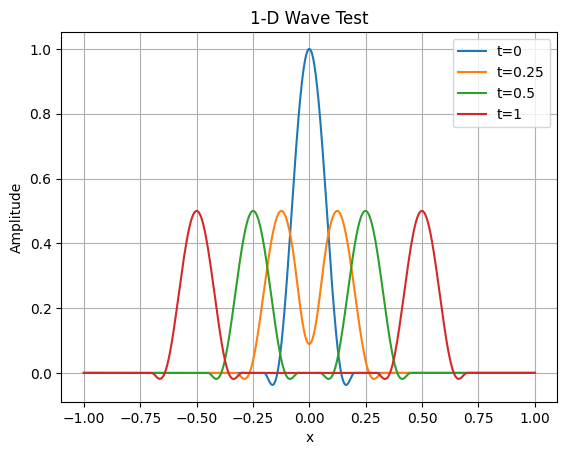

In [66]:
# ii.Discretisation


def wave1d(Nx, Nt):

    grille_spatiale = np.linspace(-1,1,Nx)
    grille_temporelle = np.linspace(0,1,Nt)

    delta_x = 2/(Nx-1)
    delta_t = 1/(Nt-1)
    delta = (c*delta_t/delta_x)**2

    if delta>1:
        print("condition CFL non respectee") #question 6, et essentiel pour la question 7 et 8
        return 0

    #on definit U, qui stockera la solution numerique sous forme d'une matrice Nx*Nt, initialise a 0
    U = np.zeros((Nx,Nt))

    #initialiser les solutions
    for i in range(0,Nx):
        U[i,0]=u_0(grille_spatiale[i])
        U[i,1]=U[i,0] #car u1(x)=0

    #j'ai deja applique les conditions aux limites avec np.zeros

    #marche temps (recursion) pour les points interieurs
    for n in range(1,Nt-1): 
        for i in range(1,Nx-1):
            U[i,n+1]= 2*U[i,n]-U[i,n-1]+delta*(U[i-1,n]-2*U[i,n]+U[i+1,n])           
    return U    





x = np.linspace(-1,1,1000) 
t = [0, 0.25, 0.5, 1] 
#deja ecrit dans le bloc precedant mais je le rappelle


temps = np.linspace(0, 1, 500)
#0, 1/499, 2/499,...,1
#j'aurais egalement pu mettre les grilles en sortie de la fonction precedante

U = wave1d(len(x),len(temps))

plt.figure()

for i in range(len(t)):
    n = int(t[i] * (len(temps)-1)) #indice de temps n tq U[:,n] est l'approximation de la fonction u(x,t[i])
    plt.plot(x, U[:,n], label="t=" + str(t[i]))


#en effet, si temps = np.linspace(a, b, c)
#trouver l'indice de temps permettant de trouver un temps t, revient à calculer i tq tn=a+(b-a)/(c-a)
#donc i = (t-a)*(c-1)/(b-a)


#On remarque que les graphes representes par les solutions approximatives sont quasiment identiques
#a ceux presentes par les solutions exactes

plt.xlabel("x")
plt.ylabel("Amplitude")
plt.title("1-D Wave Test")
plt.legend()
plt.grid()
plt.show()


1.277490466867599


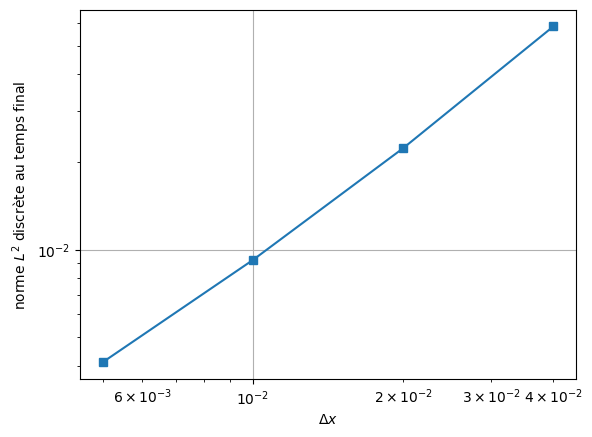

In [67]:
#iv. Convergence et analyse d'erreur



def Norme_Erreur_au_temps_final(Nx,Nt):
    erreur = 0.0
    U = wave1d(Nx,Nt)
    delta_x = 2/(Nx-1)

    for i in range(Nx):
        x_i = -1 + i * delta_x
        erreur += (U[i,Nt-1]-solution_exacte(x_i,1))**2*delta_x
    return erreur**(0.5)
        

Nx_list = [51,101,201,401]
Delta_x = []
Error_list = []

#choisissons Nt en faisant en sorte que delta t/delta x = 1, ainsi comme c=1/2, on aura c²(delta t/delta x)²=1/4<=1, ce qui respecte les conditions CFL

#On a, en reprennant la définition de delta t et delta x de la fonction wave1d : 
#   delta t/delta x = 1
#   (1/Nt-1)/(2/Nx-1) = 1
#   Nt = (Nx-1)/2 +1, on remarque que les Nx sont impairs, ce qui donne un résultat entier





for Nx in Nx_list:
    Nt = int((Nx-1)/2+1)
    Delta_x.append(2/(Nx-1))
    Error_list.append(Norme_Erreur_au_temps_final(Nx,Nt))
    
    
    
#calcul de la pente

pente = 0
somme = 0

for i in range(len(Nx_list)-1):
    pente += (np.log(Error_list[i+1])-np.log(Error_list[i]))/(np.log(Delta_x[i+1])-np.log(Delta_x[i]))
    somme += 1

pente = pente/somme
print(pente)


plt.figure()
plt.loglog(Delta_x,Error_list, '-s')
plt.xlabel(r'$ \Delta x$')
plt.ylabel("norme "+ r'$L^2$' + " discrète au temps final")
plt.grid()
plt.show()


#La pente observée devrait être proche de 2, l'ordre de convergence est de 2 en espace

0.3824463543491334


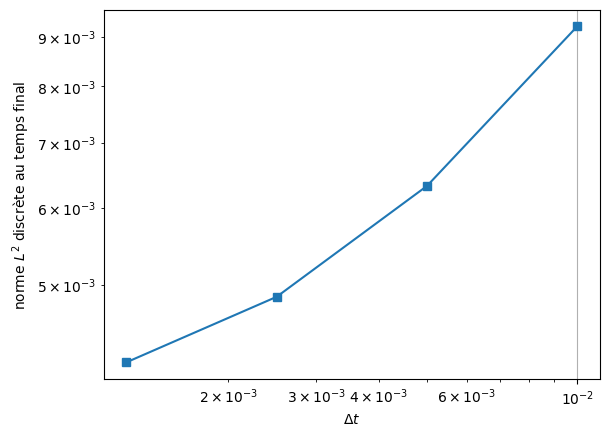

In [68]:
Nx = 201
Nt_list = [101,201,401,801]
Delta_t = []
Error_list2 = []

# c²(delta t/delta x)² = (1/2)²(201-1)/(2(Nt-1)) <= 1 pour tout Nt de la liste, donc les conditions CFL sont respectees

for Nt in Nt_list:
    Delta_t.append(1/(Nt-1))
    Error_list2.append(Norme_Erreur_au_temps_final(Nx,Nt))


#calcul de la pente

pente = 0
somme = 0

for i in range(len(Nt_list)-1):
    pente += (np.log(Error_list2[i+1])-np.log(Error_list2[i]))/(np.log(Delta_t[i+1])-np.log(Delta_t[i]))
    somme += 1

pente = pente/somme
print(pente)



    
plt.figure()
plt.loglog(Delta_t,Error_list2, '-s') 
plt.xlabel(r'$ \Delta t$')
plt.ylabel("norme "+ r'$L^2$' + " discrète au temps final")
plt.grid()
plt.show()


#La pente observée devrait être proche de 2, l'ordre de convergence est de 2 en temps